<a href="https://colab.research.google.com/github/itakumi/B4-/blob/master/shimosaka_final_17B01590.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
# requirements
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv

# Datasets

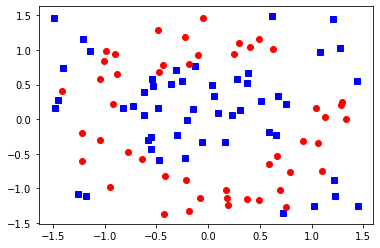

In [69]:
# dataset 1
np.random.seed(123)
n = 100
x_d1 = 3 * (np.random.rand(n, 2)-0.5)
radius = x_d1[:,0]**2 + x_d1[:,1]**2
y_d1 = (radius > 0.7 + 0.1 * np.random.randn(n)) &( radius < 2.2 + 0.1 * np.random.randn(n))
y_d1 = 2 * y_d1 -1

plt.plot(x_d1[y_d1 < 0, 0],  x_d1[y_d1 < 0, 1], 'bs')
plt.plot(x_d1[y_d1 > 0, 0],  x_d1[y_d1 > 0, 1], 'ro')

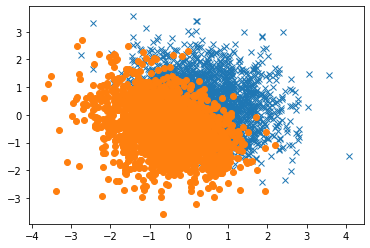

In [70]:
# dataset 2
n = 4000
omega = np.random.randn()
noise = 0.8 * np.random.randn(n)

x_d2 = np.random.randn(n, 2) + 0
y_d2 = 2 * (omega * x_d2[:,0] + x_d2[:,1] + noise > 0) - 1

plt.plot(np.extract(y_d2>0,x_d2[:,0]),np.extract(y_d2>0,x_d2[:,1]), 'x')
plt.plot(np.extract(y_d2<0,x_d2[:,0]),np.extract(y_d2<0,x_d2[:,1]), 'o')

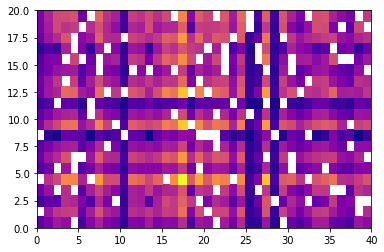

In [71]:
#dataset3
np.random.seed(1234)
m = 20
n = 40
r = 2
A = np.dot(np.random.rand(m, r), np.random.rand(r, n)).flatten()
ninc = 100
Q = np.random.permutation(m * n)[:ninc]
A[Q] = None
A = A.reshape(m, n)

plt.pcolor(A, cmap=plt.cm.plasma)

In [92]:
# dataset 4
n = 200
x_d4 = 3 * (np.random.rand(n, 4) - 0.5) #-0.5~0.5において乱数を生成(200*4)
y_d4 = (2 * x_d4[:, 0] - 1 * x_d4[:,1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y_d4 = 2 * y_d4 -1
x_d4 = np.hstack([x_d4, np.ones((n, 1))]) #bias項の追加

In [73]:
# dataset 5
n = 200
x_d5 = 3 * (np.random.rand(n, 4) - 0.5)
W = np.array([[ 2,  -1, 0.5,],
              [-3,   2,   1,],
              [ 1,   2,   3]])
y_d5 = np.argmax(np.dot(np.hstack([x_d5[:,:2], np.ones((n, 1))]), W.T)
                        + 0.5 * np.random.randn(n, 3), axis=1)
x_d5 = np.hstack([x_d5, np.ones((n, 1))]) #bias項の追加

In [74]:
# dataset 6
d_d6 = 200
n_d6 = 180

# we consider 5 groups where each group has 40 attributes
groupSize = 5
attrSize = 40
g_d6 = np.arange(groupSize*attrSize).reshape(groupSize,-1)

x_d6 = np.random.randn(n_d6, d_d6)
noise_d6 = 0.5

# we consider feature in group 1 and group 2 is activated.
w_d6 = np.vstack([20 * np.random.randn(80, 1),
                 np.zeros((120, 1)),
                 5 * np.random.rand()])
x_d6_tilde = np.hstack([x_d6, np.ones((n_d6, 1))])
y_d6 = np.dot(x_d6_tilde, w_d6) + noise_d6 * np.random.randn(n_d6, 1)

# Problem 1

In [75]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy
np.random.seed(123)

##Problem 1-1

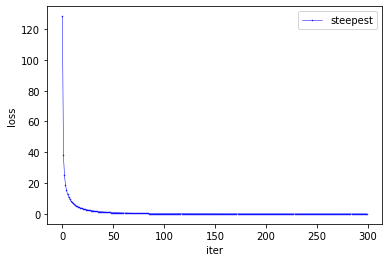

In [94]:
loss_hist_batch = [] # to store the history of loss J(w_t)

num_iter = 300
ww = np.random.rand(5)
alpha_base = 0.02
lam = 0.01

for t in range(1,num_iter+1):
    posterior = 1 / (1 + np.exp(-y_d4.reshape(200,1) * (np.dot(x_d4,ww.reshape(5,1))))) #事後確率
    direction =  -(np.sum(((1 - posterior).reshape(200,1) * (-y_d4).reshape(200,1) * x_d4),axis=0) + 2*lam*ww) #勾配
    ll = np.sum(np.log(1.0 + np.exp(-y_d4.reshape(200,1) * (np.dot(x_d4,ww.reshape(5,1)))))) + lam*np.dot(ww.T,ww) #loss計算
    loss_hist_batch.append(ll);
    ww = ww + alpha_base * 1.0 * direction; #ww更新

TrueSolution_batch=min(loss_hist_batch) #最適な値を探す
plt.plot(abs(loss_hist_batch-TrueSolution_batch), 'bo-', linewidth=0.5, markersize=0.5, label='steepest')
plt.legend()
plt.xlabel('iter')
plt.ylabel('loss')
plt.show()

##Problem 1-2

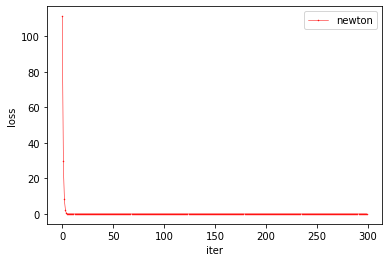

In [95]:
loss_hist_newton = [] # to store the history of loss J(w_t)

ww = np.random.rand(5)
num_iter = 300
alpha = 1
lam = 0.01

for t in range(1,num_iter+1):
    posterior = 1 / (1 + np.exp(-y_d4.reshape(200,1) * (np.dot(x_d4,ww.reshape(5,1))))) #事後確率
    grad =  -(np.sum(((1 - posterior).reshape(200,1) * (-y_d4).reshape(200,1) * x_d4),axis=0) + 2*lam*ww) #勾配

    #以下ヘシアンの計算
    hess=2*lam*np.eye(5) #5*5
    for i in range(200):
      hess += (posterior[i] * (1 - posterior[i]) * np.dot(x_d4[i].reshape(5,1),x_d4[i].reshape(5,1).T))
    ll = np.sum(np.log(1.0 + np.exp(-y_d4.reshape(200,1) * (np.dot(x_d4,ww.reshape(5,1)))))) + lam*np.dot(ww.T,ww) #loss計算
    loss_hist_newton.append(ll)
    ww = ww + np.dot(grad , np.linalg.inv(hess)) * alpha

TrueSolution_newton=min(loss_hist_newton)
plt.plot(abs(loss_hist_newton-TrueSolution_newton), 'ro-', linewidth=0.5, markersize=0.5, label='newton')
plt.legend()
plt.xlabel('iter')
plt.ylabel('loss')
plt.show()

##Problem 1-3

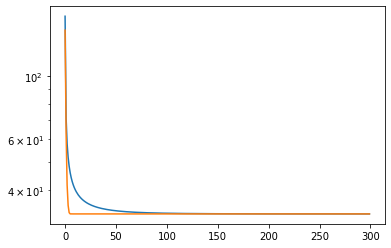

In [96]:
# plot the result
plt.plot(loss_hist_batch)
plt.plot(loss_hist_newton)
plt.yscale('log')

## Problem 1-4

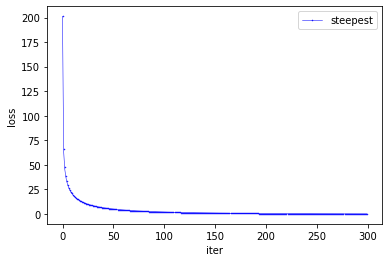

In [79]:
loss_hist_batch = [] # to store the history of loss J(w_t)

num_iter = 300
ww = np.random.rand(3,5)
alpha_base = 0.02
lam = 0.01

for t in range(1,num_iter+1):
    direction=np.zeros((3,5))
    for c in range(3):#クラスごとの勾配
      direction[c] = -(-np.dot((y_d5==c).reshape(1,200),x_d5) + np.sum(x_d5.T*(np.exp(np.dot(x_d5,ww[c].T))/np.sum(np.exp(np.dot(x_d5,ww.T)),axis=1)) ,axis=1) + 2*lam*ww[c])
      """ 正解ラベルと等しい時-x_i """

    ll=np.sum(np.log(np.sum(np.exp(np.dot(x_d5,ww.T)),axis=1))-np.diag(np.dot(x_d5,ww[y_d5].T))) + lam*np.sum(np.diag(np.dot(ww.T,ww)))
    #w[y_d5]正解ラベルの重み
    loss_hist_batch.append(ll)
    ww = ww + alpha_base * 1.0 * direction

TrueSolution=min(loss_hist_batch) #最適な値を探す
plt.plot(abs(loss_hist_batch-TrueSolution), 'bo-', linewidth=0.5, markersize=0.5, label='steepest')
plt.legend()
plt.xlabel('iter')
plt.ylabel('loss')
plt.show()

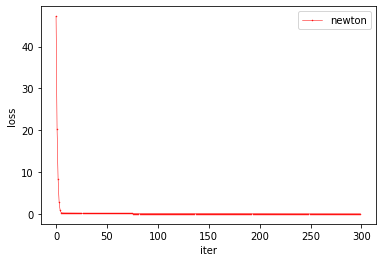

In [80]:
loss_hist_newton = [] # to store the history of loss J(w_t)
ww_n_history=[]
ww = np.random.rand(3,5)
num_iter = 300
alpha = 0.77
lam = 0.01
for t in range(1,num_iter+1):
    grad=np.zeros((3,5))
    for c in range(3):#クラスごとの勾配
      grad[c] = -(-np.dot((y_d5==c).reshape(1,200),x_d5) + np.sum(x_d5.T*(np.exp(np.dot(x_d5,ww[c].T))/np.sum(np.exp(np.dot(x_d5,ww.T)),axis=1)) ,axis=1) + 2*lam*ww[c])
      """ 正解ラベルと等しい時は(-x_i) """

    hess=np.zeros((3,5,5)) 
    for c in range(3):
      hess[c] = 2*lam*np.eye(5)
      hess[c] += np.dot((x_d5*((np.exp(np.dot(x_d5,ww[c].T))*(np.sum(np.exp(np.dot(x_d5,ww.T)),axis=1)-np.exp(np.dot(x_d5,ww[c].T))))/(np.sum(np.exp(np.dot(x_d5,ww.T)),axis=1)**2)).reshape(200,1)).T,x_d5)
      ww[c] = ww[c] + np.dot(np.linalg.inv(hess[c]),grad[c]) * alpha

    ll=np.sum(np.log(np.sum(np.exp(np.dot(x_d5,ww.T)),axis=1))-np.diag(np.dot(x_d5,ww[y_d5].T))) + lam*np.sum(np.diag(np.dot(ww.T,ww)))
    #w[y_d5]正解ラベルの重み
    loss_hist_newton.append(ll)

TrueSolution=min(loss_hist_newton)
plt.plot(abs(loss_hist_newton-TrueSolution), 'ro-', linewidth=0.5, markersize=0.5, label='newton')
plt.legend()
plt.xlabel('iter')
plt.ylabel('loss')
plt.show()
# implement Newton based method here

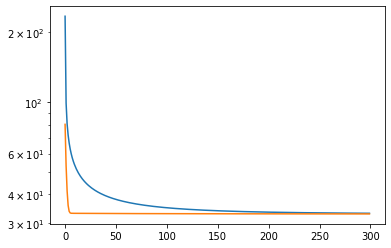

In [81]:
# plot the result
plt.plot(loss_hist_batch)#,label='steepest')
plt.plot(loss_hist_newton)#,label='newton')
plt.yscale('log')

# Problem 2

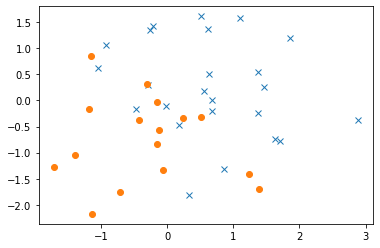

In [82]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv

# prepare dataset
np.random.seed(3846)
n = 40
omega = np.random.randn()
noise = 0.8 * np.random.randn(n)

x = np.random.randn(n, 2) + 0
y = 2 * (omega * x[:,0] + x[:,1] + noise > 0) - 1

plt.plot(np.extract(y>0,x[:,0]),np.extract(y>0,x[:,1]), 'x')
plt.plot(np.extract(y<0,x[:,0]),np.extract(y<0,x[:,1]), 'o')

In [83]:
def st_ops(mu, q):
  x_proj = np.zeros(mu.shape)
  for i in range(len(mu)):
    if mu[i] > q:
      x_proj[i] = mu[i] - q
    else:
      if np.abs(mu[i]) < q:
        x_proj[i] = 0
      else:
        x_proj[i] = mu[i] + q; 
  return x_proj

##Problem 2-1

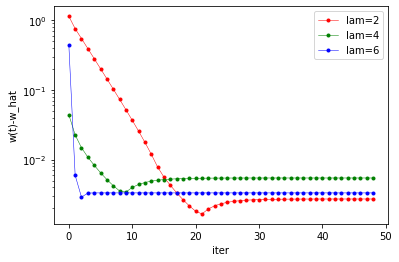

In [84]:
# condition
A = np.array([[  3, 0.5],
              [0.5,   1]])
mu = np.array([[1],
               [2]])
w_init = np.random.rand(2,1)
ww_history_lam_2=[]
ww_history_lam_4=[]
ww_history_lam_6=[]
l,v=np.linalg.eig(2*A)
ganma=1.01*np.max(l)

#lam=2の場合
wt=w_init
lam=2
for t in range(1,50):
  ww_history_lam_2.append(wt.T)
  grad = 2 * np.dot(A, wt-mu)
  xth=wt-1/ganma*grad
  wt=st_ops(xth,lam/ganma)
ww_history_lam_2=np.vstack(ww_history_lam_2)
ww_TrueSolusion_lam_2=np.array([[ 0.82], [  1.09]])

#lam=4の場合
wt=w_init
lam=4
for t in range(1,50):
  ww_history_lam_4.append(wt.T)
  grad = 2 * np.dot(A, wt-mu)
  xth=wt-1/ganma*grad
  wt=st_ops(xth,lam/ganma)
ww_history_lam_4=np.vstack(ww_history_lam_4)
ww_TrueSolusion_lam_4=np.array([[ 0.64], [0.18]])

#lam=6の場合
wt=w_init
lam=6
for t in range(1,50):
  ww_history_lam_6.append(wt.T)
  grad = 2 * np.dot(A, wt-mu)
  xth=wt-1/ganma*grad
  wt=st_ops(xth,lam/ganma)
ww_history_lam_6=np.vstack(ww_history_lam_6)
ww_TrueSolusion_lam_6=np.array([[ 0.33], [0]])

plt.plot(abs(ww_history_lam_2[:,0]-ww_TrueSolusion_lam_2[0]) +abs(ww_history_lam_2[:,1]-ww_TrueSolusion_lam_2[1]), 'ro-', markersize=3, linewidth=0.5,label='lam=2')
plt.plot(abs(ww_history_lam_4[:,0]-ww_TrueSolusion_lam_4[0]) +abs(ww_history_lam_4[:,1]-ww_TrueSolusion_lam_4[1]), 'go-', markersize=3, linewidth=0.5,label='lam=4')
plt.plot(abs(ww_history_lam_6[:,0]-ww_TrueSolusion_lam_6[0]) +abs(ww_history_lam_6[:,1]-ww_TrueSolusion_lam_6[1]), 'bo-', markersize=3, linewidth=0.5,label='lam=6')
plt.legend()
plt.xlabel('iter')
plt.ylabel('w(t)-w_hat')
plt.yscale('log')

##Problem 2-2

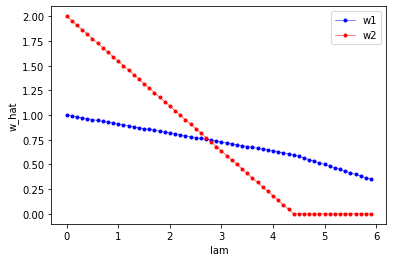

In [85]:
w_hat_lam = []
w_init = np.random.rand(2,1)
lams = np.arange(0, 6, 0.1)
w_hat = np.zeros((2,1))
l,v=np.linalg.eig(2*A)
ganma=1.01*np.max(l)
for lam in lams:
  ww_history=[]
  wt=w_init
  for t in range(1,50):
    ww_history.append(wt.T)
    grad = 2 * np.dot(A, wt-mu)
    xth=wt-1/ganma*grad
    wt=st_ops(xth,lam/ganma)
  w_hat=wt
  w_hat_lam.append(w_hat.T)

w_hat_lam=np.vstack(w_hat_lam)
plt.plot(lams, w_hat_lam[:,0], 'bo-', markersize=3, linewidth=0.5,label='w1')
plt.plot(lams, w_hat_lam[:,1], 'ro-', markersize=3, linewidth=0.5,label='w2')
plt.legend()
plt.xlabel('lam')
plt.ylabel('w_hat')
plt.show()

## example of group lasso (using dataset 6)

10.931844253368238


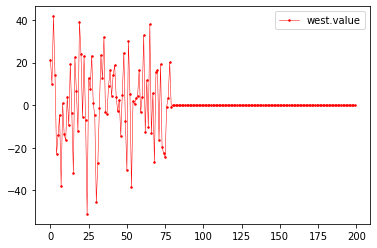

In [86]:
import cvxpy as cv
import matplotlib.pyplot as plt

def mldivide(A, b):
  piA = np.linalg.pinv(A)
  x = np.dot(piA, b)
  return x

# run the cell which preparing dataset 6 before run this cell
y = y_d6
x_tilde = x_d6_tilde
w = w_d6
noise = noise_d6
n = n_d6
d = d_d6
g = g_d6

lam = 1.0
wridge = mldivide(np.dot(x_tilde.T, x_tilde) + lam * np.eye(d+1), 
                  np.dot(x_tilde.T, y))

# cvx
west = cv.Variable((d+1,1))
obj_fn = \
  0.5 / n * cv.quad_form(x_tilde * west - y, np.eye(x_tilde.shape[0])) + \
  lam * (cv.norm(west[g[0]], 2.0) + \
         cv.norm(west[g[1]], 2.0) + \
         cv.norm(west[g[2]], 2.0) + \
         cv.norm(west[g[3]], 2.0) + \
         cv.norm(west[g[4]], 2.0) )
  
objective = cv.Minimize(obj_fn)
constraints = []

prob = cv.Problem(objective, constraints)
result = prob.solve(solver=cv.CVXOPT)

# test
x_test = np.random.randn(n, d)
x_test_tilde = np.hstack([x_test, np.ones((n, 1))])
y_test = np.dot(x_test_tilde, w) + noise * np.random.randn(n, 1)
y_pred = np.dot(x_test_tilde, west.value)
print(np.mean((y_pred - y_test)**2))
plt.plot(west.value[0:d], 'r-o', markersize=1.5, linewidth=0.5,label='west.value')
plt.legend()
plt.show()

##Problem 2-3

0.21371140014363346


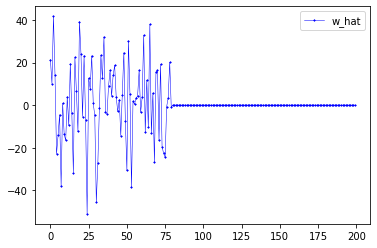

In [97]:
import cvxpy as cv
import matplotlib.pyplot as plt

def mldivide(A, b):
  piA = np.linalg.pinv(A)
  x = np.dot(piA, b)
  return x

# run the cell which preparing dataset 6 before run this cell
y = y_d6
x_tilde = x_d6_tilde
w = w_d6
noise = noise_d6
n = n_d6
d = d_d6
g = g_d6
eta=0.2
w_tilde = np.zeros(((201,1)),dtype=float)
lam = 1.0
wridge = mldivide(np.dot(x_tilde.T, x_tilde) + lam * np.eye(d+1), 
                  np.dot(x_tilde.T, y))

w_init=np.random.rand(201,1)
w_tilde=w_init
num_iter=500
plot_history=[]
for i in range(num_iter):
  for t in range(201):
    w_tilde[t]=w[t]-eta/n*(np.dot(np.dot(x_tilde.T,x_tilde),w)-np.dot(x_tilde.T,y))[t]
    for j in range(5):
      w_tilde_gj_l2norm=float(np.sum(np.sqrt(np.dot(w_tilde[g[j]].T,w_tilde[g[j]]))))
      w[g[j]]=max(0.0,1.0-(eta*lam/w_tilde_gj_l2norm))*w_tilde[g[j]]

w_hat=w

# test
x_test = np.random.randn(n, d)
x_test_tilde = np.hstack([x_test, np.ones((n, 1))])
y_test = np.dot(x_test_tilde, w) + noise * np.random.randn(n, 1)
y_pred = np.dot(x_test_tilde, w_hat)
print(np.mean((y_pred - y_test)**2))

plt.plot(w_hat[0:d], 'b-*', markersize=1.5, linewidth=0.5,label='w_hat')
plt.legend()
plt.show()

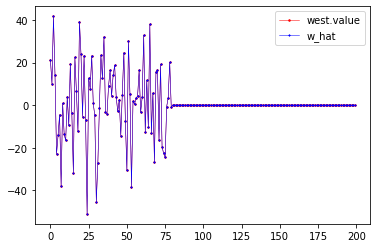

In [99]:
plt.plot(west.value[0:d], 'r-o', markersize=1.5, linewidth=0.5,label='west.value')
plt.plot(w_hat[0:d], 'b-*', markersize=1.5, linewidth=0.5,label='w_hat')
plt.legend()
plt.show()

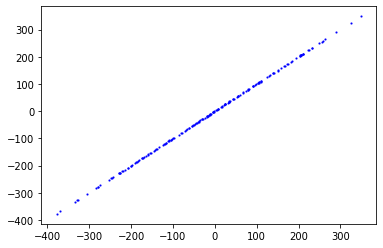

In [100]:
plt.plot(y_test, y_pred, 'bs', markersize=1)

In [101]:
print('carinality of w hat: %d'%sum(np.abs(west.value) < 0.01))
print('carinality of w ground truth: %d'%sum(np.abs(w) < 0.01))

carinality of w hat: 120
carinality of w ground truth: 120


#Problem 3

##Problem3-3

last value of La= 47.34650077516897
last value of Lw= 47.34650134775102


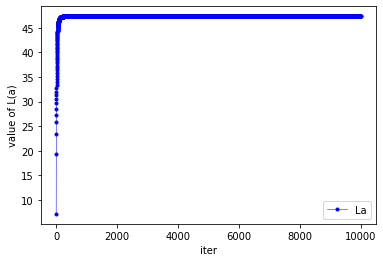

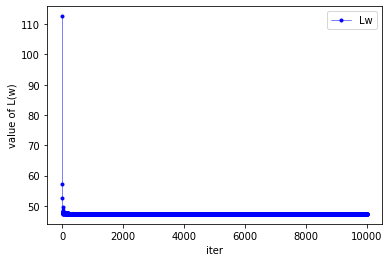

In [102]:
import matplotlib.pyplot as plt
lam=1.0
l,v=np.linalg.eig(np.dot(x_d4.T,x_d4))
eta=1/(1.01*np.max(l))*4
num_iter=10000
alpha=np.random.rand(200,1)
K=np.zeros((200,200))
w_hat=np.zeros((5,1))
La_history=[]
Lw_history=[]
for i in range(200):
  for j in range(200):
    K[i][j]=y_d4[i]*y_d4[j]*np.dot(x_d4[i].T,x_d4[j])

for t in range(1,num_iter):
  wi=alpha-eta*(1/(2*lam)*np.dot(K,alpha)-1)
  for i in range(200):
    if wi[i]>=1:
      alpha[i]=1
    elif wi[i]<0:
      alpha[i]=0
    else:
      alpha[i]=wi[i]
  w_hat=1/(2*lam)*np.sum(alpha.reshape(200,1)*y_d4.reshape(200,1)*x_d4,axis=0)#*np.sum(x_d4,axis=0)
  La=(-1/(4*lam)*np.dot(np.dot(alpha.T,K),alpha)+np.dot(alpha.T,np.ones((200,1))))[0][0]
  La_history.append(La)
  Lw=np.sum(np.maximum(np.zeros((200,1)),(np.ones((200,1))-(y_d4.reshape(200,1)*np.dot(x_d4,w_hat.reshape(5,1))).reshape(200,1))))+lam*np.sum(np.dot(w_hat.T,w_hat))
  Lw_history.append(Lw)
print("last value of La=",La_history[-1])
print("last value of Lw=",Lw_history[-1])

plt.figure()
plt.plot(La_history, 'bo-', markersize=3, linewidth=0.5,label='La')
plt.legend()
plt.xlabel('iter')
plt.ylabel('value of L(a)')
plt.show()

plt.figure()
plt.plot(Lw_history, 'bo-', markersize=3, linewidth=0.5,label='Lw')
plt.legend()
plt.xlabel('iter')
plt.ylabel('value of L(w)')
plt.show()